## Federal Courts Project

** I used the federal judges database which is also a source of Washington Post's article. **

https://www.washingtonpost.com/news/monkey-cage/wp/2018/06/14/are-trumps-judicial-nominees-really-being-confirmed-at-a-record-pace-the-answer-is-complicated/

https://www.fjc.gov/history/judges/biographical-directory-article-iii-federal-judges-export

** WaPo's article analysed the pace of judicial confirmation of Trump' nominees by using 'Nomination Date' and 'Confirmation Date. I tried to investigete from another angle. Interestingly, this database contains the result of Senate vote, 'Ayes/Nays'. So I focused on this column and compared with other presidencies. **

In [1]:
import pandas as pd
import re

In [2]:
df_judge = pd.read_csv('federal-judicial-service.csv', na_values='  ')
df_judge.dtypes

nid                                    int64
Sequence                               int64
Judge Name                            object
Court Type                            object
Court Name                            object
Appointment Title                     object
Appointing President                  object
Party of Appointing President         object
Reappointing President                object
Party of Reappointing President       object
ABA Rating                            object
Seat ID                               object
Statute Authorizing New Seat          object
Recess Appointment Date               object
Nomination Date                       object
Committee Referral Date               object
Hearing Date                          object
Judiciary Committee Action            object
Committee Action Date                 object
Senate Vote Type                      object
Ayes/Nays                             object
Confirmation Date                     object
Commission

In [3]:
df_judge = df_judge.dropna(subset=['Ayes/Nays'])
df_judge = df_judge[['Judge Name','Court Name','Appointing President','Ayes/Nays']]
df_judge.head()

,Judge Name,Court Name,Appointing President,Ayes/Nays
0,"Abrams, Leslie Joyce",U.S. District Court for the Middle District of...,Barack Obama,100/0
1,"Abrams, Ronnie",U.S. District Court for the Southern District ...,Barack Obama,96/2
21,"Adams, John R.",U.S. District Court for the Northern District ...,George W. Bush,91/0
26,"Africk, Lance M.",U.S. District Court for the Eastern District o...,George W. Bush,97/0
27,"Agee, G. Steven",U.S. Court of Appeals for the Fourth Circuit,George W. Bush,96/0


Then, from the 'Ayes/Nays' column, I break into two columns, 'Ayes' and 'Nays' which counts the number of vote at the Senate confirmation.

In [4]:
df_judge['Ayes'] = df_judge['Ayes/Nays'].str.split('/',expand=True)[0].astype(int)
df_judge['Nays'] = df_judge['Ayes/Nays'].str.split('/', expand=True)[1].astype(int)
df_judge.head()

,Judge Name,Court Name,Appointing President,Ayes/Nays,Ayes,Nays
0,"Abrams, Leslie Joyce",U.S. District Court for the Middle District of...,Barack Obama,100/0,100,0
1,"Abrams, Ronnie",U.S. District Court for the Southern District ...,Barack Obama,96/2,96,2
21,"Adams, John R.",U.S. District Court for the Northern District ...,George W. Bush,91/0,91,0
26,"Africk, Lance M.",U.S. District Court for the Eastern District o...,George W. Bush,97/0,97,0
27,"Agee, G. Steven",U.S. Court of Appeals for the Fourth Circuit,George W. Bush,96/0,96,0


** Trump's nominees face relatively high 'Nays' vote at the Senate confirmation. **

In [5]:
df_judge.groupby('Appointing President').mean()['Nays'].sort_values(ascending=False)

Appointing President
George H.W. Bush         31.000000
William H. Taft          26.000000
Herbert Hoover           24.000000
Franklin D. Roosevelt    22.714286
Ronald Reagan            21.400000
Donald J. Trump          20.975610
Harry S Truman           20.000000
Jimmy Carter             19.800000
Grover Cleveland         19.500000
Benjamin Harrison        19.200000
James A. Garfield        18.500000
Gerald Ford              18.000000
John F. Kennedy          16.000000
Chester A. Arthur        15.500000
Dwight D. Eisenhower     15.500000
James Buchanan           14.666667
Woodrow Wilson           14.000000
Ulysses Grant            13.500000
Andrew Jackson           12.714286
William J. Clinton       10.240000
Lyndon B. Johnson         9.500000
Barack Obama              9.111607
John Adams                9.000000
William McKinley          8.000000
Warren G. Harding         8.000000
Abraham Lincoln           8.000000
George Washington         7.500000
Richard M. Nixon          7.500000

** Using the regular expression, I made a new column 'Circuit' where each judge belongs to. **

In [6]:
df_judge['Circuit'] = df_judge['Court Name'].str.replace(r'\b[\w\s.]+for ', '')
df_judge['Circuit'] = df_judge['Circuit'].str.replace(r' Circuit', '')
df_judge['Circuit'] = df_judge['Circuit'].str.replace(r'\b[\w\s]+of ', '')
df_judge['Circuit'] = df_judge['Circuit'].str.replace(r'the ', '')

In [7]:
df_judge['Circuit'].replace(regex=['First', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Puerto Rico'], value='1', inplace=True)
df_judge['Circuit'].replace(regex=['Second', 'Connecticut', 'New York', 'Vermont'], value='2', inplace=True)
df_judge['Circuit'].replace(regex=['Third', 'Delaware', 'New Jersey', 'Pennsylvania', 'Virgin Islands'], value='3', inplace=True)
df_judge['Circuit'].replace(regex=['Fourth', 'Maryland', 'North Carolina', 'South Carolina', r'^Virginia', 'West Virginia'], value='4', inplace=True)
df_judge['Circuit'].replace(regex=['Fifth', 'Louisiana', 'Mississippi', 'Texas'], value='5', inplace=True)
df_judge['Circuit'].replace(regex=['Sixth', 'Kentucky', 'Michigan', 'Ohio', 'Tennessee'], value='6', inplace=True)
df_judge['Circuit'].replace(regex=['Seventh', 'Illinois', 'Indiana', 'Wisconsin'], value='7', inplace=True)
df_judge['Circuit'].replace(regex=['Eighth', 'Arkansas', 'Iowa', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'], value='8', inplace=True)
df_judge['Circuit'].replace(regex=['Ninth', 'Alaska', 'Arizona', 'California', 'Hawaii', 'Idaho', 'Montana', 'Oregon', 'Nevada', 'Washington'], value='9', inplace=True)
df_judge['Circuit'].replace(regex=['Tenth', 'Colorado', 'Kansas', 'New Mexico', 'Oklahoma', 'Utah', 'Wyoming'], value='10', inplace=True)
df_judge['Circuit'].replace(regex=['Eleventh', 'Alabama', 'Florida', 'Georgia'], value='11', inplace=True)
df_judge['Circuit'].replace(regex=[r'^Columbia.*', 'Federal', 'United States', 'Claims', 'U.S. International Trade', 'U.S. Customs and Patent Appeals'], value='12', inplace=True)
df_judge['Circuit'] = df_judge['Circuit'].astype(int)
df_judge['Circuit'].value_counts()

9     97
12    92
3     52
6     51
5     51
11    50
2     47
4     44
8     38
10    36
7     31
1     15
Name: Circuit, dtype: int64

** For mapping, I used the federal court map which consits with 12 circuits. **

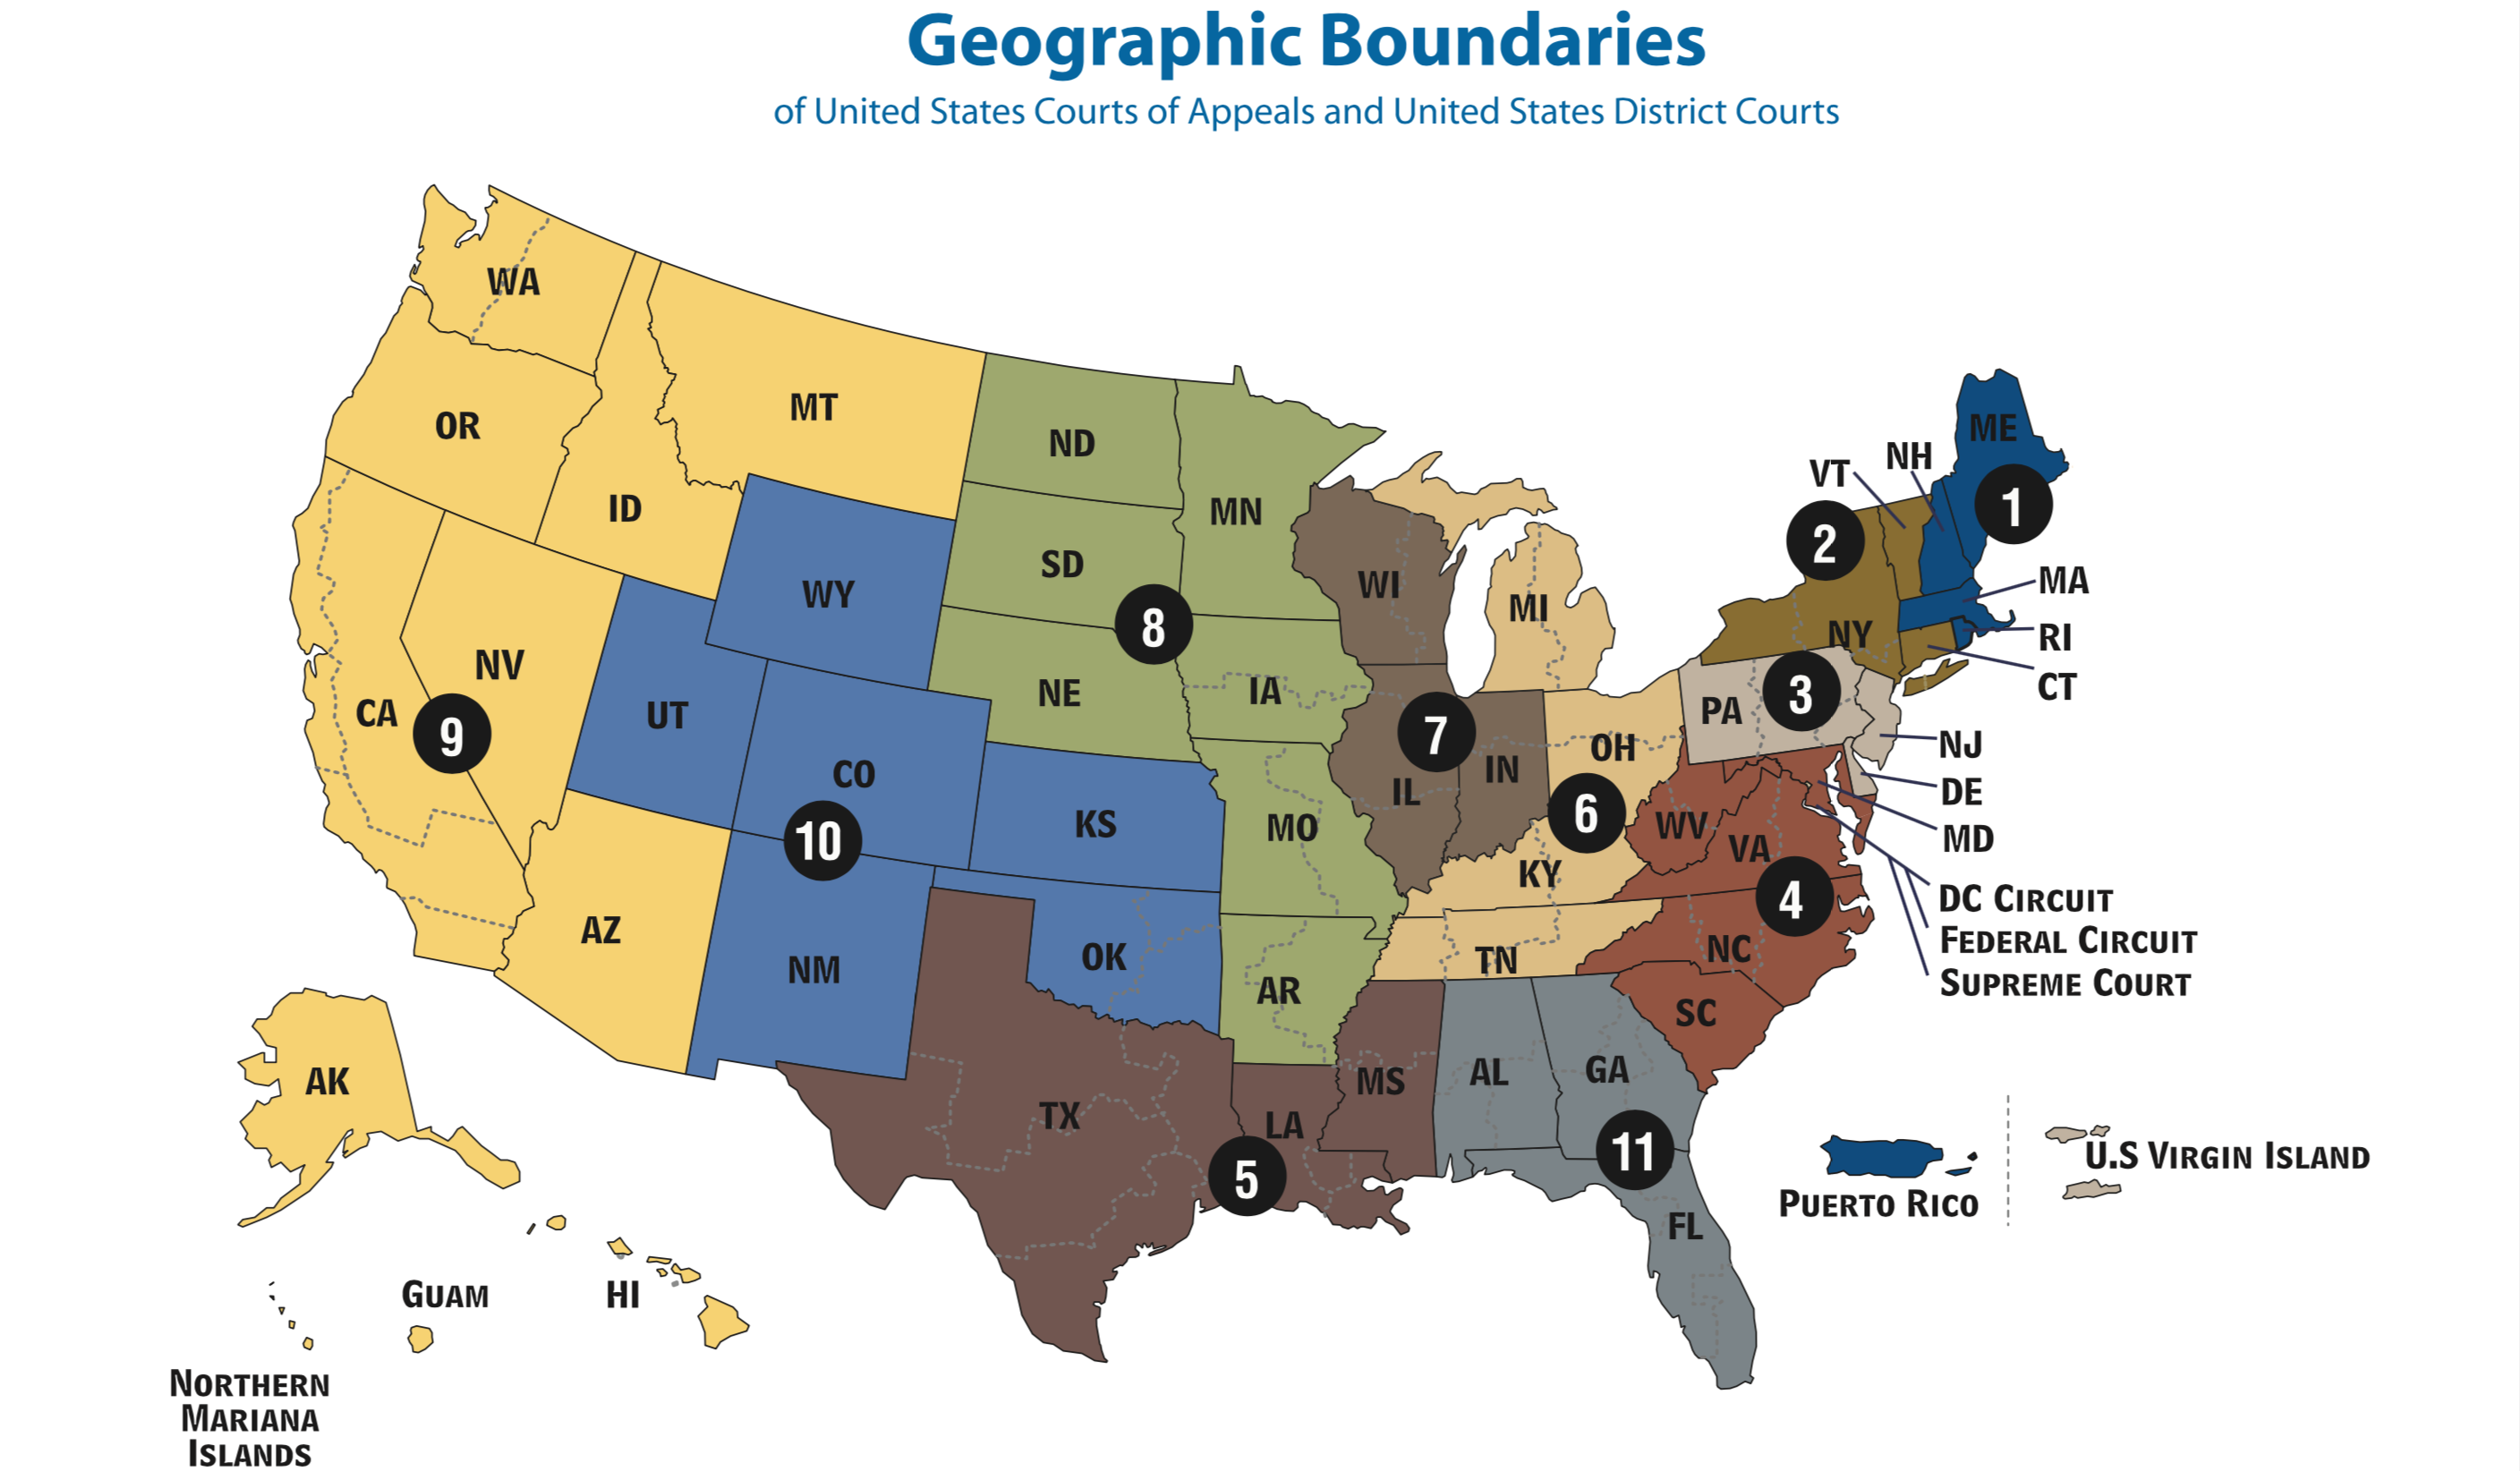

In [8]:
from IPython.display import Image
fig = Image(filename=('boundaries.png'))
fig

In [9]:
import requests
import json
import numpy as np
from pandas.io.json import json_normalize

In [10]:
with open('US_12_Dist.json') as json_data:
    geometry_data = json.load(json_data)

In [11]:
df = pd.DataFrame.from_dict(json_normalize(geometry_data['features']), orient='columns')
df['properties.name'] = df['properties.District_N'].str.replace('District of Columbia', '12')
df['properties.name'] = df['properties.name'].astype(int)
df

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5


In [12]:
df_court = pd.read_csv('US_District_Court_Jurisdictions.csv')
df_court.head()

,FID,ABBR,DISTRICT,SQ_Miles,Shape_Leng,Shape_Area,District_N,Shape__Area,Shape__Length
0,1,ALM,ALABAMA MIDDLE,1.557104e+04,9.918902,3.851034,11,3.851034,9.918902
1,2,ALN,ALABAMA NORTHERN,2.279241e+04,12.526683,5.752874,11,5.752874,12.526683
2,3,ALS,ALABAMA SOUTHERN,3.672870e+04,14.291408,3.267182,11,3.267182,14.291408
3,4,AK,ALASKA,2.130451e+07,787.366223,279.696379,9,279.696379,787.366223
4,5,AZ,ARIZONA,1.140598e+05,23.752602,28.930993,9,28.930993,23.752602


In [13]:
df_circuit = df_court.groupby('District_N')['DISTRICT'].apply(', '.join).reset_index()
df_circuit['District_N'].replace('District of Columbia', '12', inplace=True)
df_circuit['District_N'] = df_circuit['District_N'].astype(int)
df_circuit.rename(index=str, columns={"District_N": "properties.name"}, inplace=True)
df_circuit['DISTRICT'] = df_circuit['DISTRICT'].str.title()
df_circuit.rename(index=str, columns={"DISTRICT": "properties.headline"}, inplace=True)
df_circuit

,properties.name,properties.headline
0,1,"Maine, Massachusetts, New Hampshire, Puerto Ri..."
1,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern..."
2,11,"Alabama Middle, Alabama Northern, Alabama Sout..."
3,2,"Connecticut, New York Eastern, New York Northe..."
4,3,"New Jersey, Pennsylvania Eastern, Pennsylvania..."
5,4,"Delaware, Maryland, North Carolina Eastern, No..."
6,5,"Louisiana Eastern, Louisiana Middle, Louisiana..."
7,6,"Kentucky Eastern, Kentucky Western, Michigan E..."
8,7,"Illinois Central, Illinois Southern, Indiana N..."
9,8,"Arkansas Eastern, Arkansas Western, Iowa North..."


In [14]:
df_merged = pd.merge(df, df_circuit, on=['properties.name','properties.name'])
df_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout..."
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi..."
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North..."
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern..."
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe..."
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No..."
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N..."
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E..."
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana..."


** First, I analaysed the Trump's nominees by calculating average 'Nays' votes for each circuit. **

In [15]:
df_Trump = df_judge[df_judge['Appointing President'] == 'Donald J. Trump']
Trump_Nays = df_Trump.groupby('Circuit').mean()['Nays']
Trump_Nays

Circuit
3     43.000000
4     14.000000
5     21.375000
6     19.555556
7     22.250000
8     30.333333
9      0.000000
10    26.000000
11    15.200000
12    21.600000
Name: Nays, dtype: float64

In [16]:
Trump = pd.DataFrame(Trump_Nays)
Trump.to_csv('Trump.csv')
Trump = pd.read_csv('Trump.csv')
Trump.rename(index=str, columns={"Circuit": "properties.name", "Nays": "properties.Nays"}, inplace=True)
Trump

,properties.name,properties.Nays
0,3,43.000000
1,4,14.000000
2,5,21.375000
3,6,19.555556
4,7,22.250000
5,8,30.333333
6,9,0.000000
7,10,26.000000
8,11,15.200000
9,12,21.600000


In [17]:
Trump_merged = pd.merge(df_merged, Trump, how='outer', on=['properties.name','properties.name'])
Trump_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",15.200000
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",0.000000
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",30.333333
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",26.000000
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",NaN
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",14.000000
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,21.600000
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",22.250000
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",19.555556
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",21.375000


In [18]:
df_Trump['Judge'] = '<p>' + df_Trump['Judge Name'] + ' | ' + df_Trump['Court Name'] + ' | ' + df_Trump['Ayes/Nays'] + '</p>'
df_Trump['Judge'].head()

/Users/kazuhiro.kida/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


121    <p>Axon, Annemarie Carney | U.S. District Cour...
169    <p>Barrett, Amy Coney | U.S. Court of Appeals ...
262    <p>Bibas, Stephanos | U.S. Court of Appeals fo...
333    <p>Boom, Claria Horn | U.S. District Court for...
334    <p>Boom, Claria Horn | U.S. District Court for...
Name: Judge, dtype: object

In [19]:
Trump_Judges = df_Trump.groupby('Circuit')['Judge'].apply(''.join).reset_index()
Trump_Judges.rename(index=str, columns={"Circuit": "properties.name", "Judge": "properties.article"}, inplace=True)
Trump_Judges

,properties.name,properties.article
0,3,"<p>Bibas, Stephanos | U.S. Court of Appeals fo..."
1,4,"<p>Coggins, Donald Cecil, Jr. | U.S. District ..."
2,5,"<p>Counts, Walter David III | U.S. District Co..."
3,6,"<p>Boom, Claria Horn | U.S. District Court for..."
4,7,"<p>Barrett, Amy Coney | U.S. Court of Appeals ..."
5,8,"<p>Erickson, Ralph R. | U.S. Court of Appeals ..."
6,9,"<p>Nye, David Charles | U.S. District Court fo..."
7,10,"<p>Carson, Joel McElroy III | U.S. Court of Ap..."
8,11,"<p>Axon, Annemarie Carney | U.S. District Cour..."
9,12,"<p>Friedrich, Dabney Langhorne | U.S. District..."


In [20]:
df_complete = pd.merge(Trump_merged, Trump_Judges, how='outer', on=['properties.name','properties.name'])
df_complete

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays,properties.article
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",15.200000,"<p>Axon, Annemarie Carney | U.S. District Cour..."
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",0.000000,"<p>Nye, David Charles | U.S. District Court fo..."
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",30.333333,"<p>Erickson, Ralph R. | U.S. Court of Appeals ..."
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",26.000000,"<p>Carson, Joel McElroy III | U.S. Court of Ap..."
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",NaN,NaN
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",14.000000,"<p>Coggins, Donald Cecil, Jr. | U.S. District ..."
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,21.600000,"<p>Friedrich, Dabney Langhorne | U.S. District..."
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",22.250000,"<p>Barrett, Amy Coney | U.S. Court of Appeals ..."
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",19.555556,"<p>Boom, Claria Horn | U.S. District Court for..."
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",21.375000,"<p>Counts, Walter David III | U.S. District Co..."


In [21]:
def color(row):
    if row['properties.Nays'] > 40:
        return '#FC4E2A'
    elif row['properties.Nays'] > 30:
        return '#FD8D3C'
    elif row['properties.Nays'] > 20:
        return '#FEB24C'
    elif row['properties.Nays'] > 10:
        return '#FED976'
    else:
        return '#FFEDA0'

In [22]:
df_complete['properties.color'] = df_complete.apply(color, axis=1)

In [23]:
df_complete['properties.group_id'] = 0
df_complete['properties.group_name'] = 'Trump'
df_complete

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays,properties.article,properties.color,properties.group_id,properties.group_name
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",15.200000,"<p>Axon, Annemarie Carney | U.S. District Cour...",#FED976,0,Trump
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",0.000000,"<p>Nye, David Charles | U.S. District Court fo...",#FFEDA0,0,Trump
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",30.333333,"<p>Erickson, Ralph R. | U.S. Court of Appeals ...",#FD8D3C,0,Trump
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",26.000000,"<p>Carson, Joel McElroy III | U.S. Court of Ap...",#FEB24C,0,Trump
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",NaN,NaN,#FFEDA0,0,Trump
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",14.000000,"<p>Coggins, Donald Cecil, Jr. | U.S. District ...",#FED976,0,Trump
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,21.600000,"<p>Friedrich, Dabney Langhorne | U.S. District...",#FEB24C,0,Trump
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",22.250000,"<p>Barrett, Amy Coney | U.S. Court of Appeals ...",#FEB24C,0,Trump
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",19.555556,"<p>Boom, Claria Horn | U.S. District Court for...",#FED976,0,Trump
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",21.375000,"<p>Counts, Walter David III | U.S. District Co...",#FEB24C,0,Trump


** Then, compared with other presidencies. **

In [24]:
df_Obama = df_judge[df_judge['Appointing President'] == 'Barack Obama']
Obama_Nays = df_Obama.groupby('Circuit').mean()['Nays']
Obama_Nays

Circuit
1     13.000000
2      9.730769
3     11.187500
4      8.842105
5      0.250000
6     11.125000
7      8.307692
8      7.428571
9     12.809524
10     3.583333
11     1.789474
12    14.000000
Name: Nays, dtype: float64

In [25]:
Obama = pd.DataFrame(Obama_Nays)
Obama.to_csv('Obama.csv')
Obama = pd.read_csv('Obama.csv')
Obama.rename(index=str, columns={"Circuit": "properties.name", "Nays": "properties.Nays"}, inplace=True)
Obama

,properties.name,properties.Nays
0,1,13.000000
1,2,9.730769
2,3,11.187500
3,4,8.842105
4,5,0.250000
5,6,11.125000
6,7,8.307692
7,8,7.428571
8,9,12.809524
9,10,3.583333


In [26]:
Obama_merged = pd.merge(df_merged, Obama, how='outer', on=['properties.name','properties.name'])
Obama_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",1.789474
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",12.809524
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",7.428571
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",3.583333
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",9.730769
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",8.842105
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,14.000000
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",8.307692
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",11.125000
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",0.250000


In [27]:
Obama_merged['properties.color'] = Obama_merged.apply(color, axis=1)
Obama_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays,properties.color
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",1.789474,#FFEDA0
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",12.809524,#FED976
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",7.428571,#FFEDA0
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",3.583333,#FFEDA0
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",9.730769,#FFEDA0
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",8.842105,#FFEDA0
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,14.000000,#FED976
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",8.307692,#FFEDA0
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",11.125000,#FED976
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",0.250000,#FFEDA0


In [28]:
Obama_merged['properties.group_id'] = 1
Obama_merged['properties.group_name'] = 'Obama'
Obama_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays,properties.color,properties.group_id,properties.group_name
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",1.789474,#FFEDA0,1,Obama
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",12.809524,#FED976,1,Obama
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",7.428571,#FFEDA0,1,Obama
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",3.583333,#FFEDA0,1,Obama
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",9.730769,#FFEDA0,1,Obama
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",8.842105,#FFEDA0,1,Obama
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,14.000000,#FED976,1,Obama
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",8.307692,#FFEDA0,1,Obama
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",11.125000,#FED976,1,Obama
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",0.250000,#FFEDA0,1,Obama


In [29]:
df_complete = df_complete.append(Obama_merged, sort=True)
df_complete

,geometry.coordinates,geometry.type,properties.District_N,properties.Nays,properties.article,properties.color,properties.group_id,properties.group_name,properties.headline,properties.name,type
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,15.200000,"<p>Axon, Annemarie Carney | U.S. District Cour...",#FED976,0,Trump,"Alabama Middle, Alabama Northern, Alabama Sout...",11,Feature
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,0.000000,"<p>Nye, David Charles | U.S. District Court fo...",#FFEDA0,0,Trump,"Alaska, Arizona, California Central, Californi...",9,Feature
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,30.333333,"<p>Erickson, Ralph R. | U.S. Court of Appeals ...",#FD8D3C,0,Trump,"Arkansas Eastern, Arkansas Western, Iowa North...",8,Feature
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,26.000000,"<p>Carson, Joel McElroy III | U.S. Court of Ap...",#FEB24C,0,Trump,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",10,Feature
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,NaN,NaN,#FFEDA0,0,Trump,"Connecticut, New York Eastern, New York Northe...",2,Feature


** Next, George W. Bush **

In [30]:
df_Bush = df_judge[df_judge['Appointing President'] == 'George W. Bush']
Bush_Nays = df_Bush.groupby('Circuit').mean()['Nays']
Bush_Nays

Circuit
1      0.000000
2      0.000000
3      1.565217
4      3.142857
5      3.904762
6      5.368421
7      3.000000
8      4.800000
9      0.526316
10     5.352941
11     2.647059
12    16.700000
Name: Nays, dtype: float64

In [31]:
Bush = pd.DataFrame(Bush_Nays)
Bush.to_csv('Bush.csv')
Bush = pd.read_csv('Bush.csv')
Bush.rename(index=str, columns={"Circuit": "properties.name", "Nays": "properties.Nays"}, inplace=True)
Bush

,properties.name,properties.Nays
0,1,0.000000
1,2,0.000000
2,3,1.565217
3,4,3.142857
4,5,3.904762
5,6,5.368421
6,7,3.000000
7,8,4.800000
8,9,0.526316
9,10,5.352941


In [32]:
Bush_merged = pd.merge(df_merged, Bush, how='outer', on=['properties.name','properties.name'])
Bush_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",2.647059
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",0.526316
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",4.800000
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",5.352941
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",0.000000
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",3.142857
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,16.700000
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",3.000000
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",5.368421
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",3.904762


In [33]:
Bush_merged['properties.color'] = Bush_merged.apply(color, axis=1)
Bush_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays,properties.color
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",2.647059,#FFEDA0
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",0.526316,#FFEDA0
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",4.800000,#FFEDA0
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",5.352941,#FFEDA0
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",0.000000,#FFEDA0
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",3.142857,#FFEDA0
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,16.700000,#FED976
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",3.000000,#FFEDA0
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",5.368421,#FFEDA0
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",3.904762,#FFEDA0


In [34]:
Bush_merged['properties.group_id'] = 2
Bush_merged['properties.group_name'] = 'Bush'
Bush_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays,properties.color,properties.group_id,properties.group_name
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",2.647059,#FFEDA0,2,Bush
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",0.526316,#FFEDA0,2,Bush
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",4.800000,#FFEDA0,2,Bush
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",5.352941,#FFEDA0,2,Bush
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",0.000000,#FFEDA0,2,Bush
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",3.142857,#FFEDA0,2,Bush
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,16.700000,#FED976,2,Bush
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",3.000000,#FFEDA0,2,Bush
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",5.368421,#FFEDA0,2,Bush
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",3.904762,#FFEDA0,2,Bush


In [35]:
df_complete = df_complete.append(Bush_merged, sort=True)
df_complete

,geometry.coordinates,geometry.type,properties.District_N,properties.Nays,properties.article,properties.color,properties.group_id,properties.group_name,properties.headline,properties.name,type
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,15.200000,"<p>Axon, Annemarie Carney | U.S. District Cour...",#FED976,0,Trump,"Alabama Middle, Alabama Northern, Alabama Sout...",11,Feature
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,0.000000,"<p>Nye, David Charles | U.S. District Court fo...",#FFEDA0,0,Trump,"Alaska, Arizona, California Central, Californi...",9,Feature
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,30.333333,"<p>Erickson, Ralph R. | U.S. Court of Appeals ...",#FD8D3C,0,Trump,"Arkansas Eastern, Arkansas Western, Iowa North...",8,Feature
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,26.000000,"<p>Carson, Joel McElroy III | U.S. Court of Ap...",#FEB24C,0,Trump,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",10,Feature
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,NaN,NaN,#FFEDA0,0,Trump,"Connecticut, New York Eastern, New York Northe...",2,Feature
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,14.000000,"<p>Coggins, Donald Cecil, Jr. | U.S. District ...",#FED976,0,Trump,"Delaware, Maryland, North Carolina Eastern, No...",4,Feature
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,21.600000,"<p>Friedrich, Dabney Langhorne | U.S. District...",#FEB24C,0,Trump,District Of Columbia,12,Feature
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,22.250000,"<p>Barrett, Amy Coney | U.S. Court of Appeals ...",#FEB24C,0,Trump,"Illinois Central, Illinois Southern, Indiana N...",7,Feature
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,19.555556,"<p>Boom, Claria Horn | U.S. District Court for...",#FED976,0,Trump,"Kentucky Eastern, Kentucky Western, Michigan E...",6,Feature
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,21.375000,"<p>Counts, Walter David III | U.S. District Co...",#FEB24C,0,Trump,"Louisiana Eastern, Louisiana Middle, Louisiana...",5,Feature


** And, William J. Clinton **

In [36]:
df_Clinton = df_judge[df_judge['Appointing President'] == 'William J. Clinton']
Clinton_Nays = df_Clinton.groupby('Circuit').mean()['Nays']
Clinton_Nays

Circuit
2      9.857143
3      8.833333
4      1.000000
5      8.000000
6      0.250000
7      0.500000
8      1.333333
9     17.066667
10     5.000000
11    12.666667
12    12.000000
Name: Nays, dtype: float64

In [37]:
Clinton = pd.DataFrame(Clinton_Nays)
Clinton.to_csv('Clinton.csv')
Clinton = pd.read_csv('Clinton.csv')
Clinton.rename(index=str, columns={"Circuit": "properties.name", "Nays": "properties.Nays"}, inplace=True)
Clinton

,properties.name,properties.Nays
0,2,9.857143
1,3,8.833333
2,4,1.000000
3,5,8.000000
4,6,0.250000
5,7,0.500000
6,8,1.333333
7,9,17.066667
8,10,5.000000
9,11,12.666667


In [38]:
Clinton_merged = pd.merge(df_merged, Clinton, how='outer', on=['properties.name','properties.name'])
Clinton_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",12.666667
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",17.066667
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",1.333333
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",5.000000
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",9.857143
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",1.000000
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,12.000000
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",0.500000
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",0.250000
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",8.000000


In [39]:
Clinton_merged['properties.color'] = Clinton_merged.apply(color, axis=1)
Clinton_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays,properties.color
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",12.666667,#FED976
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",17.066667,#FED976
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",1.333333,#FFEDA0
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",5.000000,#FFEDA0
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",9.857143,#FFEDA0
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",1.000000,#FFEDA0
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,12.000000,#FED976
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",0.500000,#FFEDA0
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",0.250000,#FFEDA0
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",8.000000,#FFEDA0


In [40]:
Clinton_merged['properties.group_id'] = 3
Clinton_merged['properties.group_name'] = 'Clinton'
Clinton_merged

,geometry.coordinates,geometry.type,properties.District_N,type,properties.name,properties.headline,properties.Nays,properties.color,properties.group_id,properties.group_name
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,Feature,11,"Alabama Middle, Alabama Northern, Alabama Sout...",12.666667,#FED976,3,Clinton
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,Feature,9,"Alaska, Arizona, California Central, Californi...",17.066667,#FED976,3,Clinton
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,Feature,8,"Arkansas Eastern, Arkansas Western, Iowa North...",1.333333,#FFEDA0,3,Clinton
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,Feature,10,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",5.000000,#FFEDA0,3,Clinton
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,Feature,2,"Connecticut, New York Eastern, New York Northe...",9.857143,#FFEDA0,3,Clinton
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,Feature,4,"Delaware, Maryland, North Carolina Eastern, No...",1.000000,#FFEDA0,3,Clinton
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,Feature,12,District Of Columbia,12.000000,#FED976,3,Clinton
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,Feature,7,"Illinois Central, Illinois Southern, Indiana N...",0.500000,#FFEDA0,3,Clinton
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,Feature,6,"Kentucky Eastern, Kentucky Western, Michigan E...",0.250000,#FFEDA0,3,Clinton
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,Feature,5,"Louisiana Eastern, Louisiana Middle, Louisiana...",8.000000,#FFEDA0,3,Clinton


In [41]:
df_complete = df_complete.append(Clinton_merged, sort=True)
df_complete

,geometry.coordinates,geometry.type,properties.District_N,properties.Nays,properties.article,properties.color,properties.group_id,properties.group_name,properties.headline,properties.name,type
0,"[[[[-87.9870452879999, 35.0075187680001], [-86...",MultiPolygon,11,15.200000,"<p>Axon, Annemarie Carney | U.S. District Cour...",#FED976,0,Trump,"Alabama Middle, Alabama Northern, Alabama Sout...",11,Feature
1,"[[[[-109.044883728, 36.9986305240002], [-109.0...",MultiPolygon,9,0.000000,"<p>Nye, David Charles | U.S. District Court fo...",#FFEDA0,0,Trump,"Alaska, Arizona, California Central, Californi...",9,Feature
2,"[[[[-89.7169418329998, 36.0015182500001], [-89...",MultiPolygon,8,30.333333,"<p>Erickson, Ralph R. | U.S. Court of Appeals ...",#FD8D3C,0,Trump,"Arkansas Eastern, Arkansas Western, Iowa North...",8,Feature
3,"[[[-104.052841187, 41.00169754], [-102.9998245...",Polygon,10,26.000000,"<p>Carson, Joel McElroy III | U.S. Court of Ap...",#FEB24C,0,Trump,"Colorado, Kansas, New Mexico, Oklahoma Eastern...",10,Feature
4,"[[[[-71.9642639159999, 41.3409652710002], [-71...",MultiPolygon,2,NaN,NaN,#FFEDA0,0,Trump,"Connecticut, New York Eastern, New York Northe...",2,Feature
5,"[[[[-75.5417556759999, 39.4506607060001], [-75...",MultiPolygon,4,14.000000,"<p>Coggins, Donald Cecil, Jr. | U.S. District ...",#FED976,0,Trump,"Delaware, Maryland, North Carolina Eastern, No...",4,Feature
6,"[[[-77.0261611939999, 38.801475525], [-77.0201...",Polygon,District of Columbia,21.600000,"<p>Friedrich, Dabney Langhorne | U.S. District...",#FEB24C,0,Trump,District Of Columbia,12,Feature
7,"[[[[-90.2371749879999, 41.6840248110001], [-90...",MultiPolygon,7,22.250000,"<p>Barrett, Amy Coney | U.S. Court of Appeals ...",#FEB24C,0,Trump,"Illinois Central, Illinois Southern, Indiana N...",7,Feature
8,"[[[[-82.5927886959998, 38.4185943600001], [-82...",MultiPolygon,6,19.555556,"<p>Boom, Claria Horn | U.S. District Court for...",#FED976,0,Trump,"Kentucky Eastern, Kentucky Western, Michigan E...",6,Feature
9,"[[[[-90.8935928339999, 29.0467777250001], [-90...",MultiPolygon,5,21.375000,"<p>Counts, Walter David III | U.S. District Co...",#FEB24C,0,Trump,"Louisiana Eastern, Louisiana Middle, Louisiana...",5,Feature


In [42]:
ok_json = json.loads(df_complete.to_json(orient='records'))

In [43]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data

In [44]:
geo_format = process_to_geojson(ok_json)

In [45]:
with open('geo-data.js', 'w') as outfile:
    json.dump(geo_format, outfile)

** These results are still ambiguous and not sufficient to write an article about this topic. I tried to investigate some PDF files of Senate hearing, but time is up. **